In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
linux_gray = cv.imread("/Users/miguelcamargorojas/Documents/UP/PDI-Ago-dic25/Grupo A/images/LinuxLogo.jpg", 0)

In [3]:
linux_gray.shape

(240, 320)

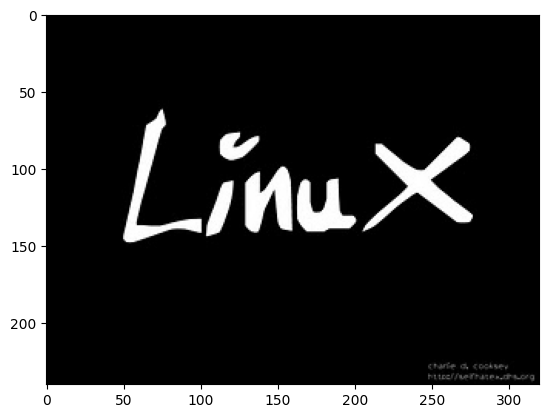

In [4]:
plt.imshow(linux_gray, cmap="gray")
plt.show()

In [5]:
np.unique(linux_gray)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 18

---
Binarizar la imagen

In [6]:
# Función de OpenCV
linux_bin = cv.threshold(linux_gray, 150, 255, cv.THRESH_BINARY)[1]

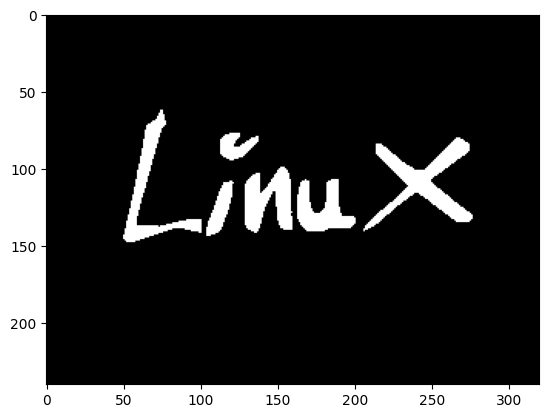

In [7]:
plt.imshow(linux_bin, cmap="gray")
plt.show()

---

In [8]:
# Con función de NumPy

posiciones = np.where(linux_gray >= 150)
posiciones

(array([ 62,  62,  63, ..., 147, 147, 147]),
 array([74, 75, 74, ..., 55, 56, 57]))

In [9]:
linux_gray[posiciones[0][100], posiciones[1][100]]

np.uint8(254)

In [17]:
linux_bin2 = np.where(linux_gray >= 150, 255, 0).astype(np.uint8)

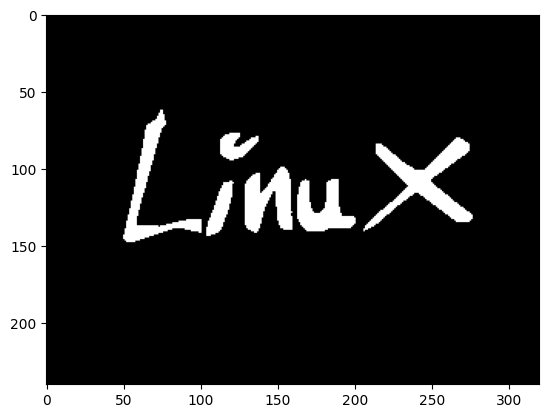

In [18]:
plt.imshow(linux_bin2, cmap="gray")
plt.show()

---
Ahora sí viene lo chido

## Erosión

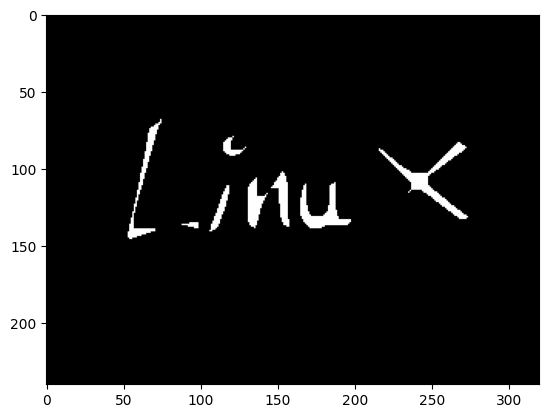

In [12]:
elemento_estructurante = np.ones((3, 3), dtype=np.uint8)
linux_erode1 = cv.erode(linux_bin, kernel=elemento_estructurante, iterations=2)
# linux_erode2 = cv.erode(linux_erode1, kernel=elemento_estructurante)
plt.imshow(linux_erode1, cmap="gray")
plt.show()

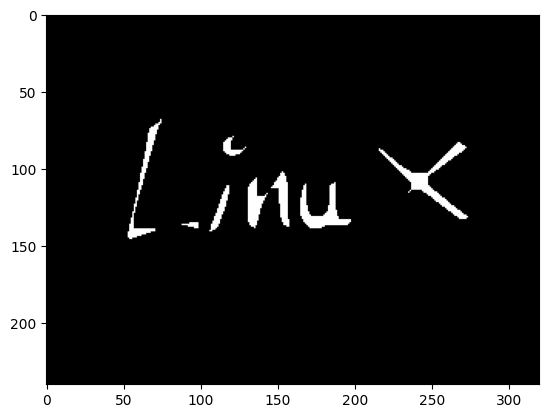

In [13]:
elemento_estructurante2 = np.ones((5, 5), dtype=np.uint8)
linux_erode2 = cv.erode(linux_bin, kernel=elemento_estructurante2, iterations=1)
# linux_erode2 = cv.erode(linux_erode1, kernel=elemento_estructurante)
plt.imshow(linux_erode2, cmap="gray")
plt.show()

---
## Dilatación

In [14]:
s_e = np.ones((3, 3), np.uint8)

In [16]:
linux_bin2.dtype

dtype('int64')

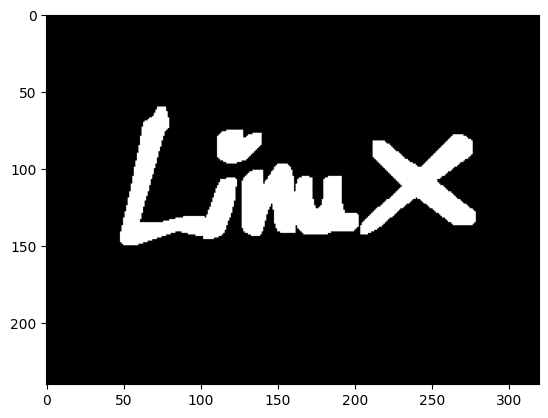

In [24]:
linux_dialte1 = cv.dilate(linux_bin2, s_e, iterations=2)
plt.imshow(linux_dialte1, cmap="gray")
plt.show()

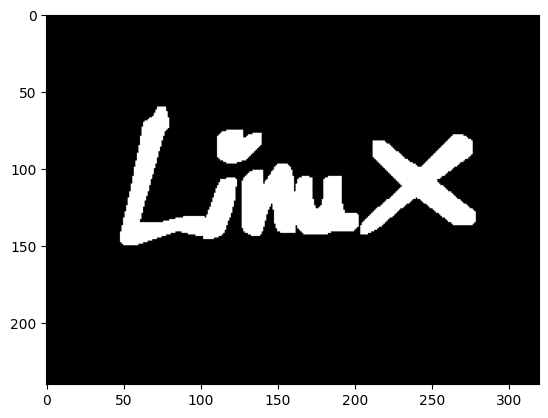

In [25]:
s_e_big = np.ones((5, 5), np.uint8)
linux_dialte2 = cv.dilate(linux_bin2, s_e_big)
plt.imshow(linux_dialte2, cmap="gray")
plt.show()

In [28]:
(linux_dialte1 == linux_dialte2).all()

np.True_

In [29]:
np.unique(linux_dialte1 == linux_dialte2)

array([ True])

---
## Bonus

In [30]:
linux_bin_inv = cv.threshold(linux_gray, 140, 255, cv.THRESH_BINARY_INV)[1]

In [31]:
def show_img(img):
    plt.imshow(img, cmap="gray")
    plt.show()

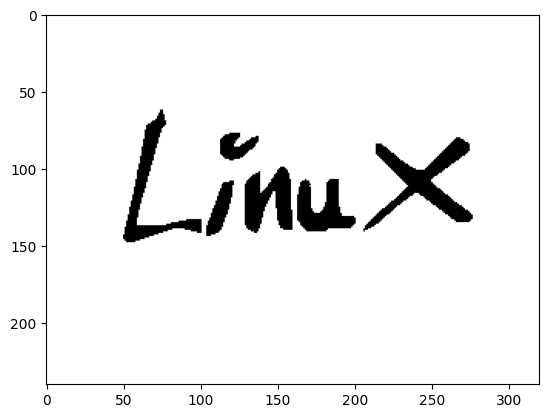

In [32]:
show_img(linux_bin_inv)

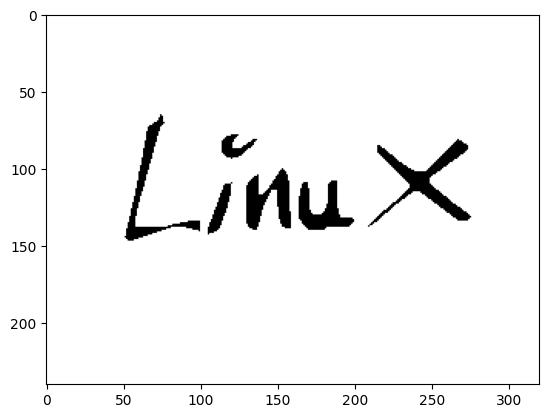

In [ ]:
show_img(cv.dilate(linux_bin_inv, s_e))

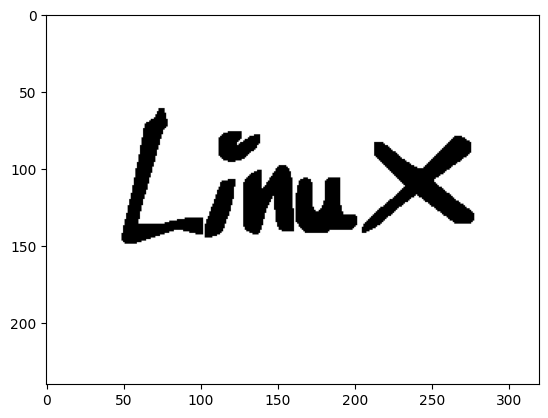

In [34]:
show_img(cv.erode(linux_bin_inv, s_e))

---

In [35]:
jota = cv.imread("/Users/miguelcamargorojas/Documents/UP/PDI-Ago-dic25/Grupo A/images/j.png", 0)

In [36]:
np.unique(jota)

array([  0, 255], dtype=uint8)

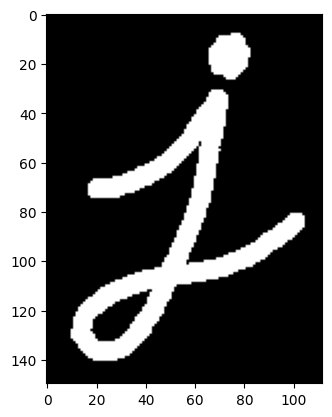

In [37]:
show_img(jota)

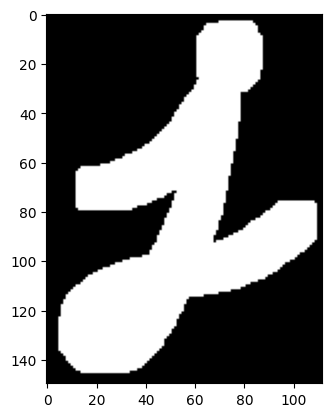

In [43]:
show_img(cv.dilate(jota, s_e, iterations=5))

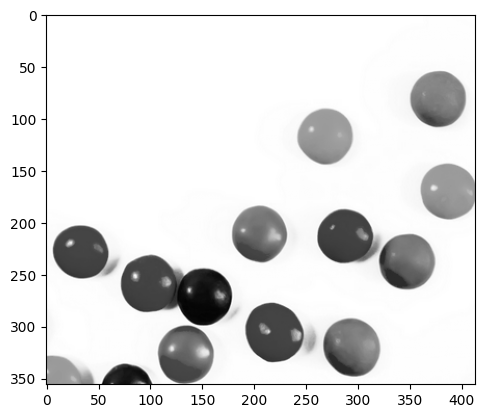

In [44]:
canicas = cv.imread("/Users/miguelcamargorojas/Documents/UP/PDI-Ago-dic25/Grupo A/images/smarties.png", 0)
show_img(canicas)

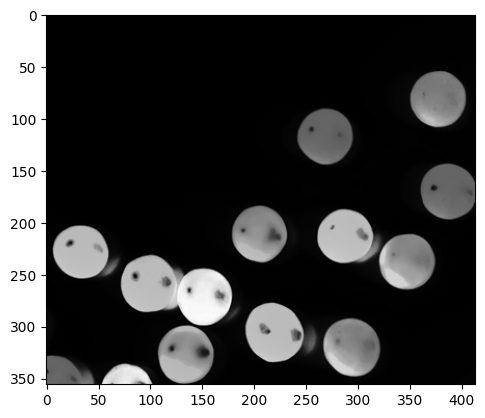

In [48]:
canicas_inv = ~canicas
show_img(canicas_inv)

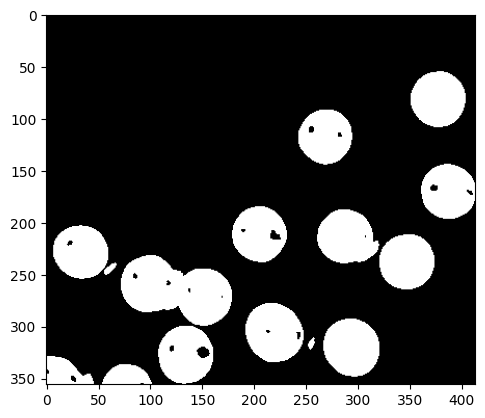

In [53]:
canicas_bin = np.where(canicas_inv >= 80, 255, 0).astype(np.uint8)
show_img(canicas_bin)

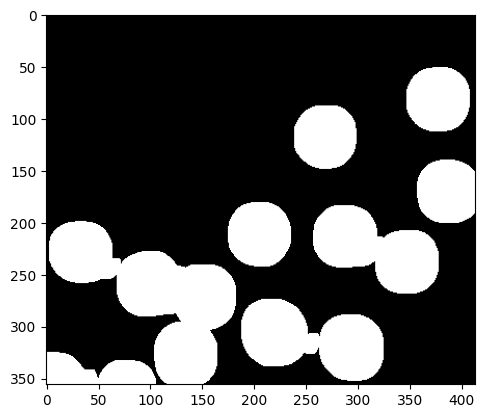

In [57]:
show_img(cv.dilate(canicas_bin, s_e, iterations=4))

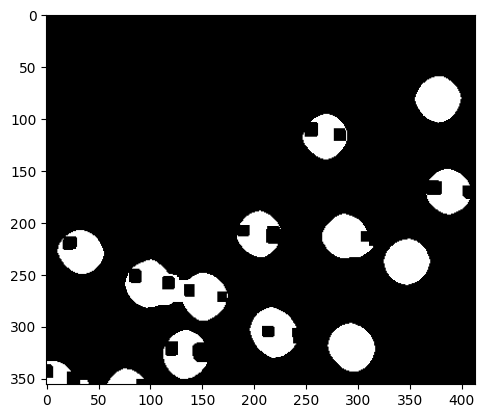

In [61]:
show_img(cv.erode(canicas_bin, s_e, iterations=4))

Detección de bordes: tomando la dilatación de una imagen y
luego restando la imagen original, se resalta así solo esos
nuevos píxeles en los bordes de los objetos que fueron
agregados por la dilatación.

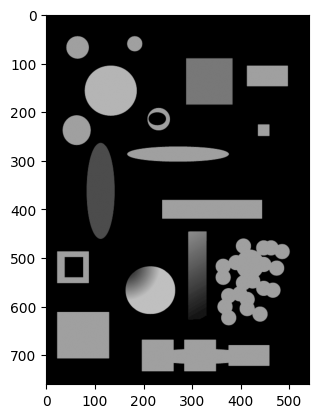

In [62]:
figuras = cv.imread("/Users/miguelcamargorojas/Documents/UP/PDI-Ago-dic25/Grupo A/images/detect_blob.png", 0)
show_img(figuras)

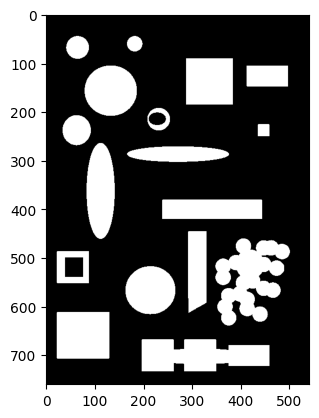

In [63]:
figuras_bin = np.where(figuras >= 30, 255, 0).astype(np.uint8)
show_img(figuras_bin)

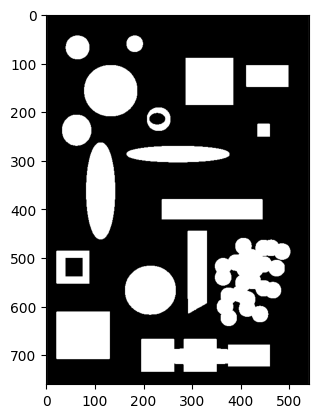

In [64]:
figuras_dilatadas = cv.dilate(figuras_bin, s_e)
show_img(figuras_dilatadas)

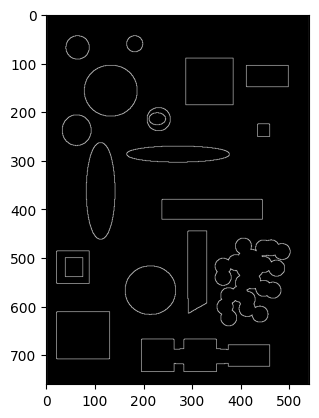

In [67]:
show_img(figuras_dilatadas - figuras_bin)